Что такое диаграмма Вороного?

Диаграмма Вороного делит плоскость на отдельные области,
где каждая область содержит ровно одну генерирующую точку (seed),
и каждая точка в данной области ближе к своему seed, чем к любому другому.
Области на краях кластера точек простираются в бесконечность

# 1. Пример работы алгоритма на заранее заданных точках

[[0.5 0.5]
 [0.5 1.5]
 [1.5 0.5]
 [1.5 1.5]]
[[], [-1, 0], [-1, 1], [1, -1, 0], [3, -1, 2], [-1, 3], [-1, 2], [0, 1, 3, 2], [2, -1, 0], [3, -1, 1]]


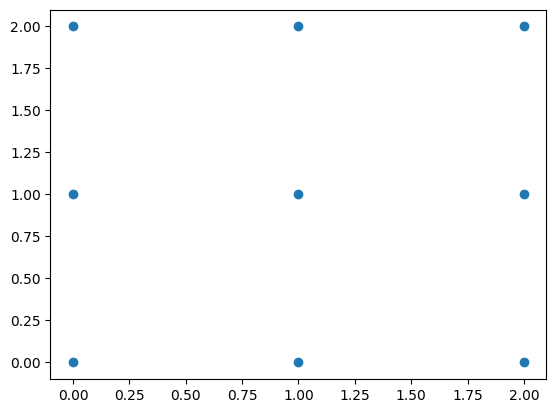

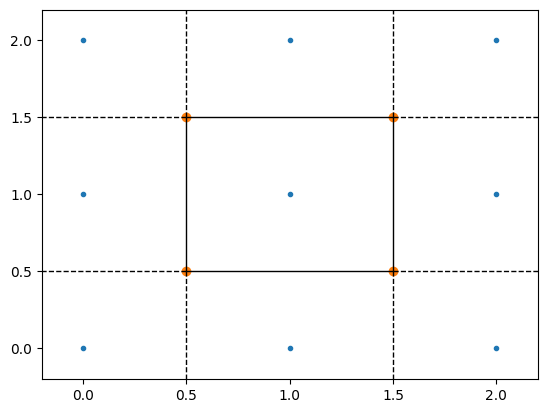

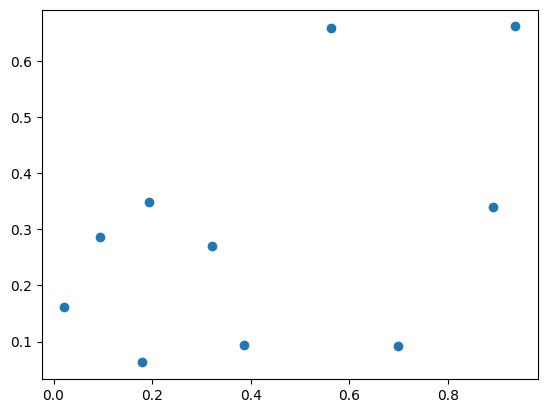

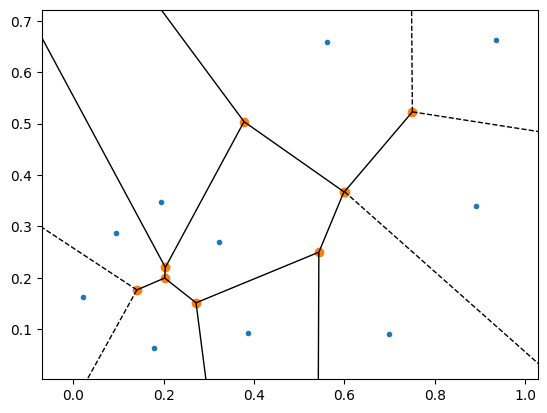

In [2]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt

points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])

plt.scatter(points[:, 0], points[:, 1])

# Создание объекта Вороного
vor = Voronoi(points)

# Получение вершин диаграммы Вороного
vor_vertices = vor.vertices
print(vor_vertices)

# Получение областей диаграммы Вороного
vor_regions = vor.regions
print(vor_regions)  # Каждый подсписок содержит координаты областей

# Использование встроенной функции для построения диаграммы
fig = voronoi_plot_2d(vor)
plt.show()

# Генерация случайных координат
coords = np.random.rand(10, 2)
vor2 = Voronoi(coords)

plt.scatter(coords[:, 0], coords[:, 1])

fig2 = voronoi_plot_2d(vor2)
plt.show()

Как диаграмма Вороного может помочь в сегментации изображений?
Что если мы найдем центры объектов и используем их в качестве точек (seed) для Вороного?
Затем сегментируем объекты, используя пороговое значение в каждой области Вороного?
Это простой способ сегментации объектов.

# 2. Пример работы алгоритма диаграмм Вороного на изображении микроорганизмов

In [3]:
from skimage import io, filters

# Загрузка изображения (не забудьте загрузить изображение в папку colab слева)
img = io.imread('temp.jpg')

# Проверка размеров изображения
img.shape

(598, 596, 4)

(598, 596)


(np.float64(-0.5), np.float64(595.5), np.float64(597.5), np.float64(-0.5))

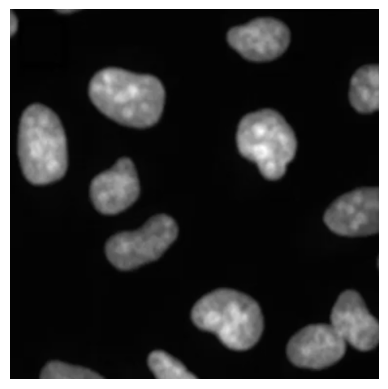

In [4]:
# отбираем тольк один цветовой канал для корректной работы (третий индекс 0 соотвествует первому по порядку каналу)
img = img[:, :, 0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.axis('off') # Убираем оси для более чистого отображения

(np.float64(-0.5), np.float64(595.5), np.float64(597.5), np.float64(-0.5))

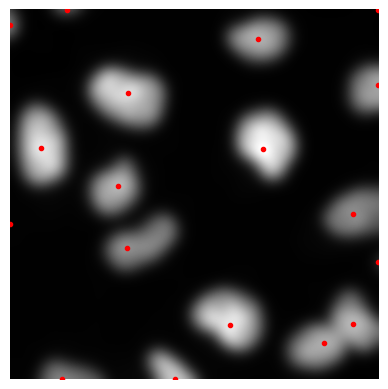

In [5]:
# Шаг 1 - Применение гауссового размытия для усреднения локальных вариаций интенсивности
img_blurred = filters.gaussian(img, sigma=11)  # Гауссовое размытие с заданным значением sigma
# (с уменьшением sigma красных точек становится больше)
plt.imshow(img_blurred, cmap='gray')  # Отображение размытого изображения
plt.axis('off')  # Убираем оси для более чистого отображения

# Шаг 2: Нахождение точек, представляющих каждый объект, для использования в Вороного
from skimage.feature import peak_local_max

# Нахождение локальных максимумов на изображении
coordinates = peak_local_max(
    img_blurred,
    min_distance=20,
    exclude_border=False
)

# Отображение результатов
plt.imshow(img_blurred, cmap='gray')  # Отображение размытого изображения
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')  # Рисование точек локальных максимумов
plt.axis('off')  # Убираем оси

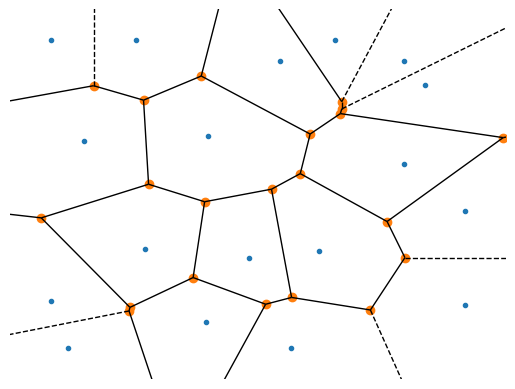

In [6]:
# Шаг 3: Создание диаграммы вороного
vor3 = Voronoi(coordinates)

fig3 = voronoi_plot_2d(vor3)
plt.axis('off')
plt.show()
# Обратите внимание, что изображение повернуто один раз против часовой стрелки

# 2.1 ДЗ часть 1: соберите указанный выше код в один метод, который на вход будет принимать путь к картинке в папке colab и возвращать диаграммы Вороного

In [1]:
# Путь к изображению
path_to_image = "leopard.JPG"

In [22]:
def voronoi_method(path):
    img = io.imread(path)
    img = img[:, :, 0]

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    img_blurred = filters.gaussian(img, sigma=11)  
    plt.imshow(img_blurred, cmap='gray')  
    plt.axis('off')  

    from skimage.feature import peak_local_max

    coordinates = peak_local_max(
        img_blurred,
        min_distance=35,
        exclude_border=False
    )

    plt.imshow(img_blurred, cmap='gray') 
    plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.') 
    plt.axis('off')  
    
    vor3 = Voronoi(coordinates)

    fig3 = voronoi_plot_2d(vor3)
    plt.axis('off')
    plt.show()

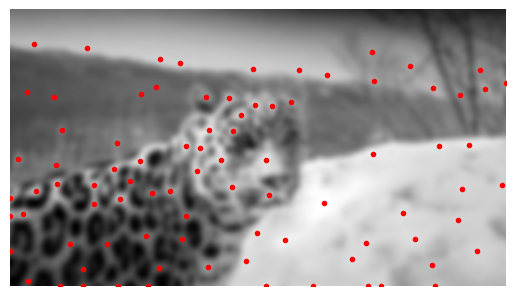

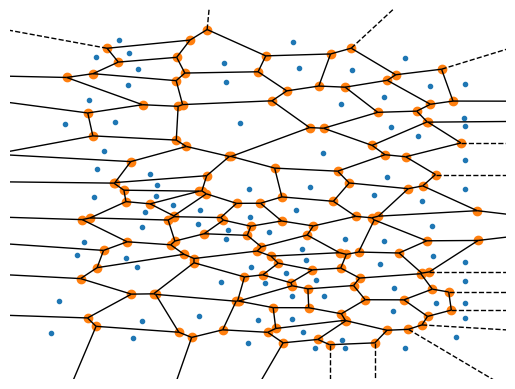

In [23]:
voronoi_method(path_to_image)

# 3. Пример использования локальных бинарных шаблонов

In [34]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Параметры LBP
radius = 3  # Радиус для поиска соседних пикселей
n_points = 8 * radius  # Количество точек по окружности

# Загружаем изображение и преобразуем его в оттенки серого
image = cv2.imread("temp.jpg", cv2.IMREAD_GRAYSCALE)

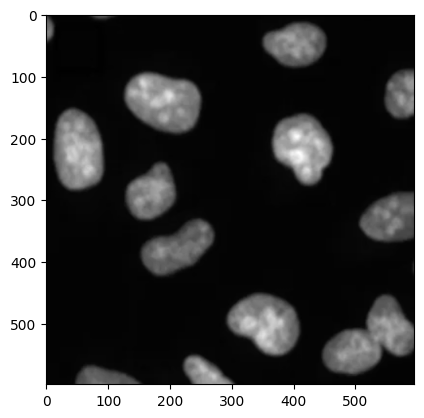

In [35]:
plt.imshow(image, cmap='gray')

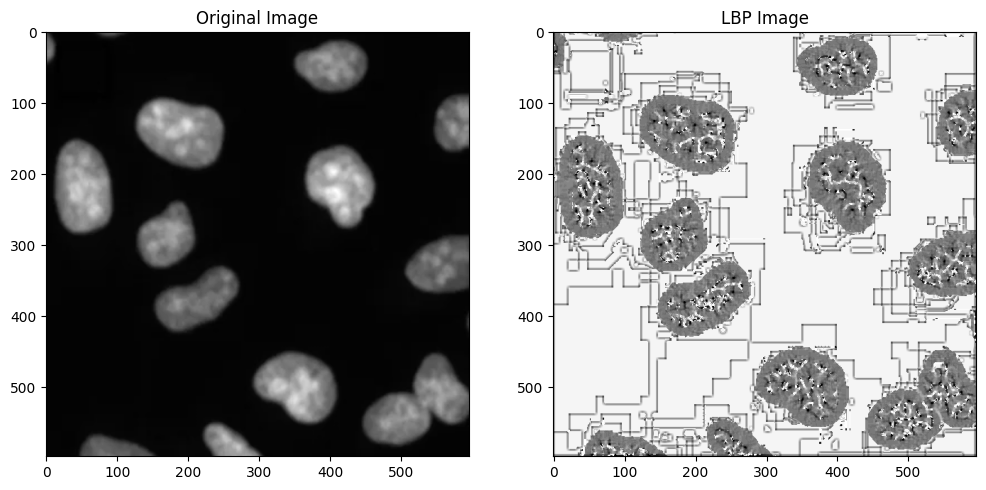

LBP Histogram: [0.00243261 0.00111109 0.00158526 0.00174239 0.00215483 0.00292923
 0.00310038 0.0063663  0.01055251 0.01674485 0.02601232 0.05589661
 0.07255168 0.0671169  0.01828522 0.03720175 0.01083028 0.03348971
 0.00856322 0.00740163 0.00565924 0.00637752 0.00475859 0.00292642
 0.57019483 0.02401461]


In [36]:
# Применение LBP к изображению
lbp = local_binary_pattern(image, n_points, radius, method="uniform")

# Построение гистограммы LBP для всего изображения
# Уникальные значения и их частоты (гистограмма)
lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Нормализуем гистограмму
lbp_hist = lbp_hist.astype("float")
lbp_hist /= (lbp_hist.sum() + 1e-6)

# Отображаем исходное изображение и его LBP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("LBP Image")
plt.imshow(lbp, cmap="gray")
plt.show()

print("LBP Histogram:", lbp_hist)

# 3.1 ДЗ часть 2: соберите указанный выше код в один метод, который на вход будет принимать путь к картинке в папке colab и возвращать результат операции определения локальных бинарных шаблонов

In [39]:
path_to_image = "brick_wall.jpg"

In [32]:
def binary_patterns(path):
    radius = 3 
    n_points = 8 * radius 

    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")

    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("LBP Image")
    plt.imshow(lbp, cmap="gray")
    plt.show()

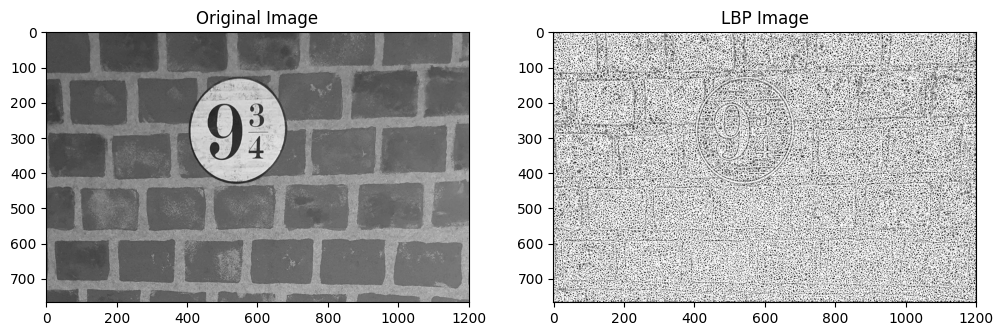

In [40]:
binary_patterns(path=path_to_image)

# 4. Пример из библиотеки scikit-image для общего развития
Документация: https://scikit-image.org/docs/0.24.x/auto_examples/features_detection/plot_local_binary_pattern.html

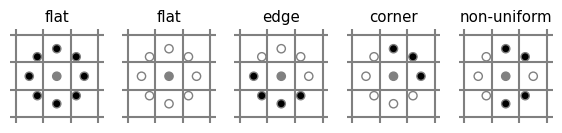

In [41]:
import numpy as np
import matplotlib.pyplot as plt


METHOD = 'uniform'
plt.rcParams['font.size'] = 9


def plot_circle(ax, center, radius, color):
    circle = plt.Circle(center, radius, facecolor=color, edgecolor='0.5')
    ax.add_patch(circle)


def plot_lbp_model(ax, binary_values):
    """Draw the schematic for a local binary pattern."""
    # Geometry spec
    theta = np.deg2rad(45)
    R = 1
    r = 0.15
    w = 1.5
    gray = '0.5'

    # Draw the central pixel.
    plot_circle(ax, (0, 0), radius=r, color=gray)
    # Draw the surrounding pixels.
    for i, facecolor in enumerate(binary_values):
        x = R * np.cos(i * theta)
        y = R * np.sin(i * theta)
        plot_circle(ax, (x, y), radius=r, color=str(facecolor))

    # Draw the pixel grid.
    for x in np.linspace(-w, w, 4):
        ax.axvline(x, color=gray)
        ax.axhline(x, color=gray)

    # Tweak the layout.
    ax.axis('image')
    ax.axis('off')
    size = w + 0.2
    ax.set_xlim(-size, size)
    ax.set_ylim(-size, size)


fig, axes = plt.subplots(ncols=5, figsize=(7, 2))

titles = ['flat', 'flat', 'edge', 'corner', 'non-uniform']

binary_patterns = [
    np.zeros(8),
    np.ones(8),
    np.hstack([np.ones(4), np.zeros(4)]),
    np.hstack([np.zeros(3), np.ones(5)]),
    [1, 0, 0, 1, 1, 1, 0, 0],
]

for ax, values, name in zip(axes, binary_patterns, titles):
    plot_lbp_model(ax, values)
    ax.set_title(name)

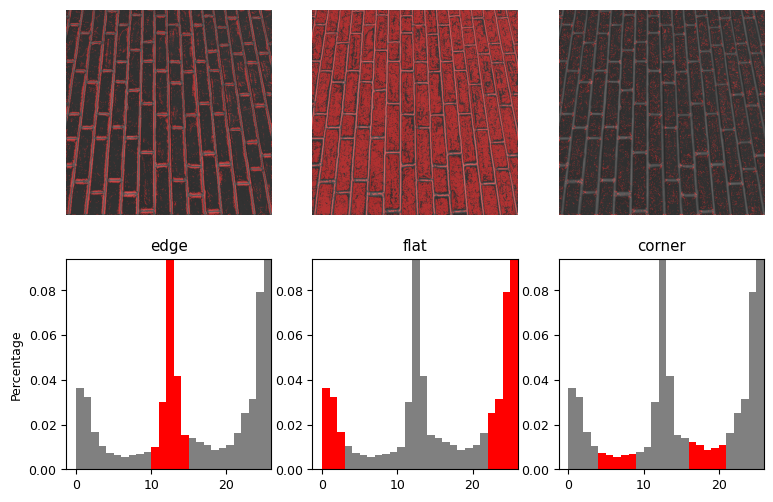

In [42]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

# settings for LBP
radius = 3
n_points = 8 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


image = data.brick()
lbp = local_binary_pattern(image, n_points, radius, METHOD)


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(
        lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5'
    )


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4  # 1/4th of the histogram
i_34 = 3 * (n_points // 4)  # 3/4th of the histogram
corner_labels = list(range(i_14 - w, i_14 + w + 1)) + list(
    range(i_34 - w, i_34 + w + 1)
)

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')